# Defeito

# Metodologia par o defeito:

As construções são as mesmas, mas incluímos um "if" para modificar a primeira partícula.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#define os valores de  massa e da constante elástica:
massa = 1
k = 1
n = int(input())

#constroi as matrizes com defeito m2=5
a = []
for z in range(0,n):
    a.append(z)
#print(a)


matriz_massa =[]
matriz_k = []
matriz = []
for z in range (0,n):
    matriz_massa.append([])
    matriz_k.append([])
    matriz.append([])
    for y in range(0,n):
        matriz_k[z].append(k)
        matriz[z].append(0)

        #aplica o defeito na matriz_massa
        if z == 1:
            matriz_massa[z].append(5)
        else:
            matriz_massa[z].append(massa)

In [42]:
#calcula os autovalores para um n definido na celula anterior em um 
# sistema homogeneo em que o a ultima massa está ligada a primeira.

a = []
for z in range(0,n):
    a.append(z)
#print(a)


for i in range(0,len(a)):
    for j in range (0,len(a)):

        if i==(j%len(a)):
            matriz[i][j] = ((matriz_k[i][(j-1)%len(a)] + matriz_k[i][(j+1)%len(a)]) / matriz_massa[i][j])
        
        if i==((j-1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])
        
        if i==((j+1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])

# Imprime a matriz resultante
print()
for p in matriz:
    print(p)


[2.0, -1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0]
[-0.2, 0.4, -0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

O menor autovalor é: -6.92397579155284e-16


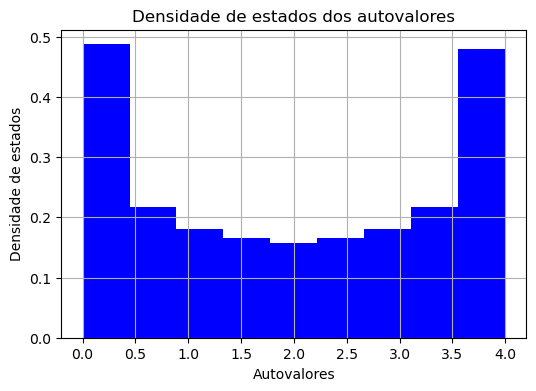

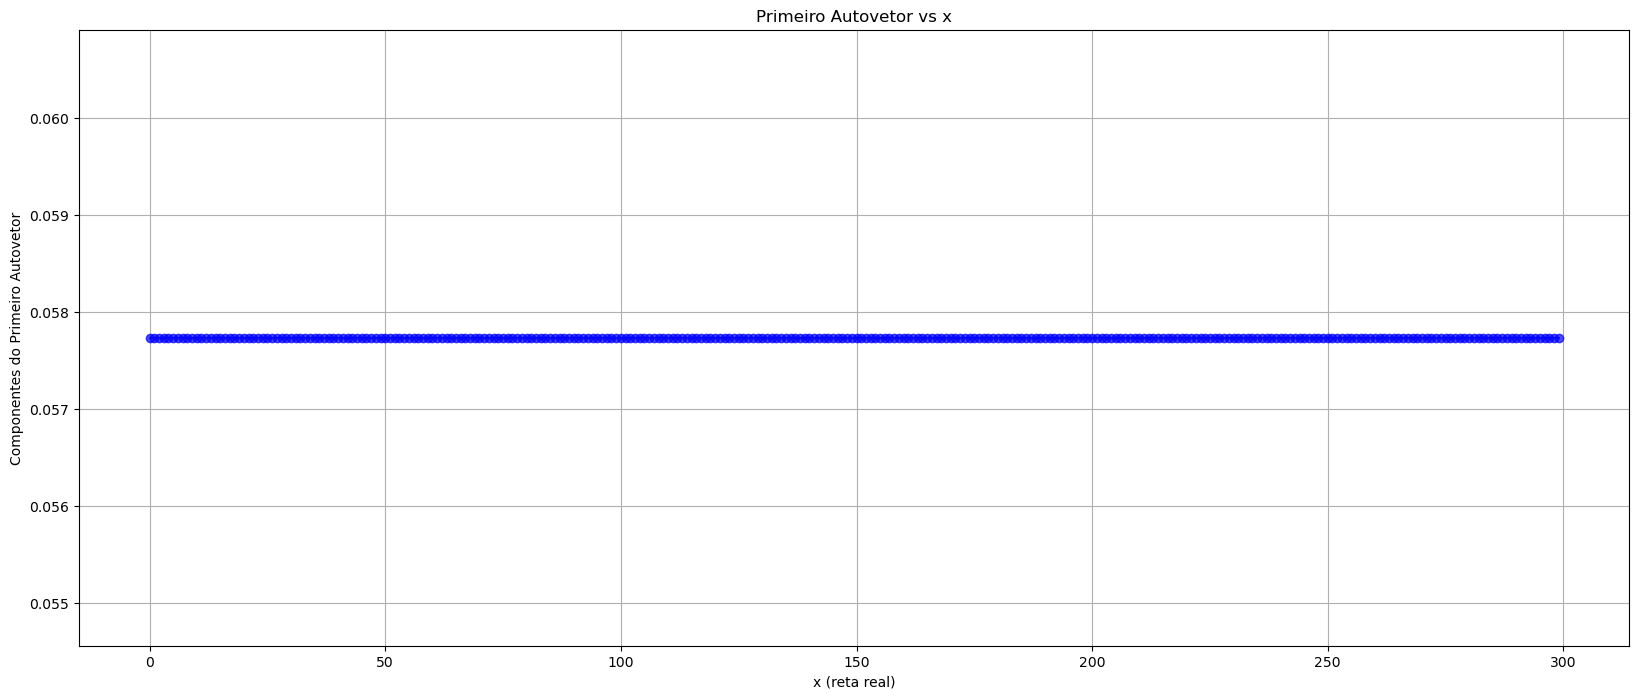

In [37]:
import matplotlib.pyplot as plt

# Calcula os autovalores da matriz
autovalores, autovetores  = np.linalg.eig(matriz)

autovalores.argsort()
autovetores.T
#print("autovetores:", autovetores[:,-1])

#Encontra o índice do menor autovalor
minautovalor= np.argmin(autovalores)
print(f"O menor autovalor é: {autovalores[minautovalor]}")

#os autovetores apresentam uma erro associado que prejudica o gráfico. então temos que pegar apenas os primeiros dígitos significativos
autovetores = np.round(autovetores, decimals=10)
#print(f"a lista de autovetores relativa ao menor autovalor é: {autovetores[:,minautovalor]}")

# Plota a densidade de estados (histograma dos autovalores)
plt.figure(figsize=(6,4))
plt.hist(autovalores, bins=9, density=True, color='blue')
plt.xlabel('Autovalores')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados dos autovalores')
plt.grid(True)
plt.show()

avt=[]
for d in autovetores[:,minautovalor]:
    avt.append(d)

# Plota o primeiro autovetor em função de uma reta real x
x = np.arange(n)
plt.figure(figsize=(20,8))
plt.plot(x, autovetores[:,minautovalor], marker='o', alpha=0.7, linestyle='-', color='blue')
plt.xlabel('x (reta real)')
plt.ylabel('Componentes do Primeiro Autovetor')
plt.title('Primeiro Autovetor vs x')
plt.grid(True)
plt.show()

# plot para o maior Autovetor

O maior autovalor é: 3.9998905212714884


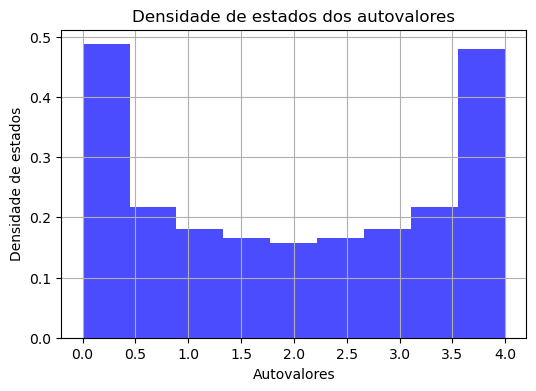

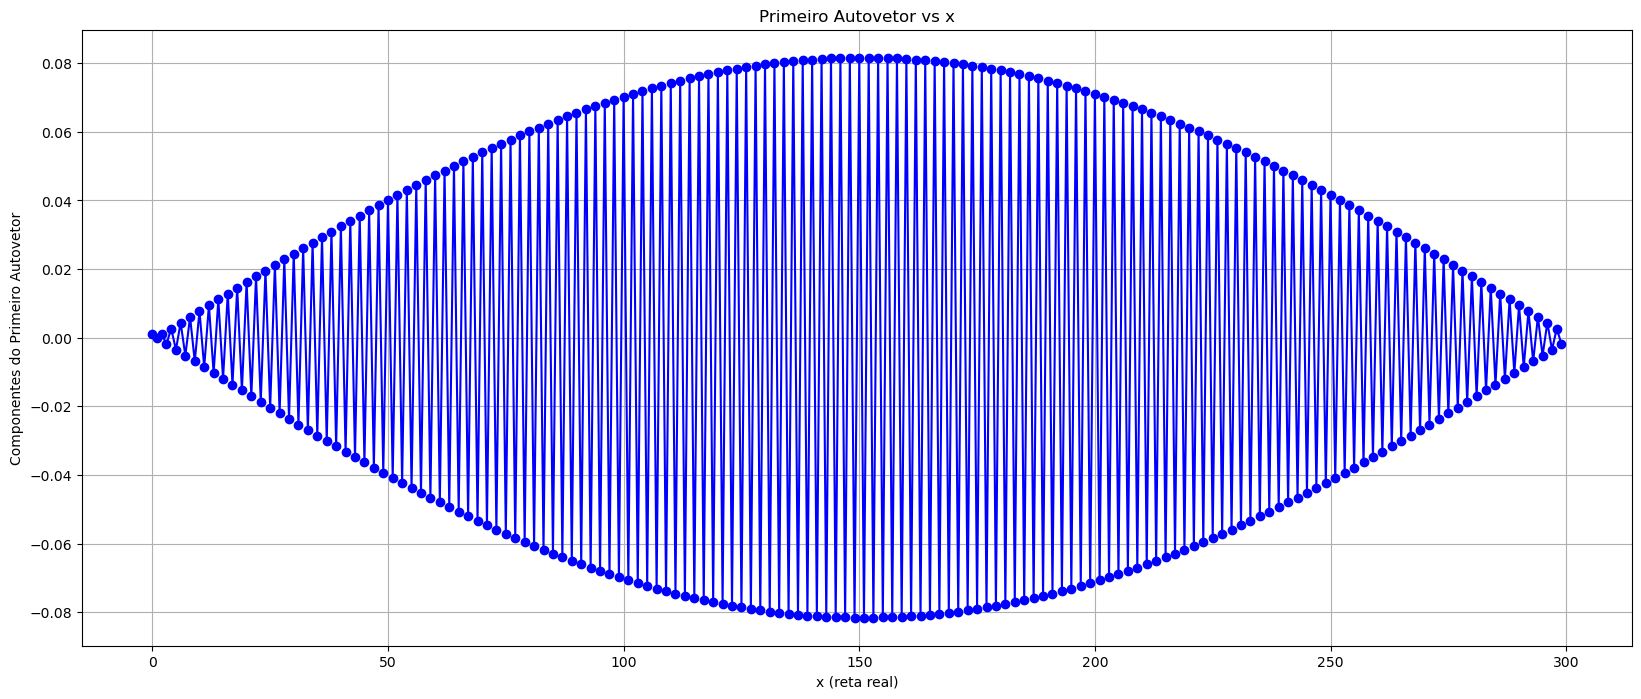

In [36]:
#Encontra o índice do maior autovalor
maxautovalor= np.argmax(autovalores)
print(f"O maior autovalor é: {autovalores[maxautovalor]}")
#print(f"a lista de autovetores relativa ao menor autovalor é: {autovetores[:,maxautovalor]}")

# Plota a densidade de estados (histograma dos autovalores)
plt.figure(figsize=(6,4))
plt.hist(autovalores, bins=9, density=True, alpha=0.7, color='blue')
plt.xlabel('Autovalores')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados dos autovalores')
plt.grid(True)
plt.show()


# Plota o primeiro autovetor em função de uma reta real x
x = np.arange(n)
plt.figure(figsize=(20,8))
plt.plot(x, autovetores[:,maxautovalor], marker='o', linestyle='-', color='blue')
plt.xlabel('x (reta real)')
plt.ylabel('Componentes do Primeiro Autovetor')
plt.title('Primeiro Autovetor vs x')
plt.grid(True)
plt.show()

# Comparação

O sistema sem defeito simula um ambiente em que as molas são livres, então se espera que os autovetores do maior autovalor apresentem os mesmos modos (portanto uma figura "quadrada"). Já o sistema com defeito, que adiciona uma massa maior e diferente das demais, simula um sistema em que uma das massas estia ligada a um ponto fixo, assim formando uma forma de "onda"
